#Training

Let's train our model to fit the best as possible our datas.

In [10]:
import os

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt  
import seaborn as sns 

# model serialization
import pickle  # for saving and loading Python objects (models, scalers, etc.)

# linear models
from sklearn.linear_model import LinearRegression  # for basic linear regression models
from sklearn.linear_model import Ridge, Lasso  # ror regularized regression (reduces overfitting)

# ensemble models
from sklearn.ensemble import RandomForestRegressor  # tree-based ensemble using bagging
from sklearn.ensemble import GradientBoostingRegressor  # tree-based ensemble using boosting

# model evaluation
from sklearn.metrics import mean_squared_error  # measures prediction error (MSE)
from sklearn.metrics import r2_score  # measures explained variance (0-1)
from sklearn.metrics import mean_absolute_error  # measures prediction error (absolute)

# model selection and validation
from sklearn.model_selection import cross_val_score  # for k-fold cross-validation
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning

#fFeature engineering
from sklearn.preprocessing import PolynomialFeatures  # creates polynomial and interaction features

# suppress warning messages
import warnings  # provides warnings about potential issues
warnings.filterwarnings('ignore')  # prevents display of warning messages

In [4]:
# set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

##Load datas

In [5]:
with open('../data/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
y_train_log = data['y_train_log']
y_test_log = data['y_test_log']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Feature names: {X_train.columns.tolist()}")

Training data shape: (1137, 13)
Testing data shape: (201, 13)
Feature names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'age_bmi', 'smoker_age', 'smoker_bmi', 'bmi_squared', 'age_squared']


Definition of evaluation function (linear regression)

Train RMSE: $4807.36
Test RMSE: $4556.20
R² Score: 0.8637


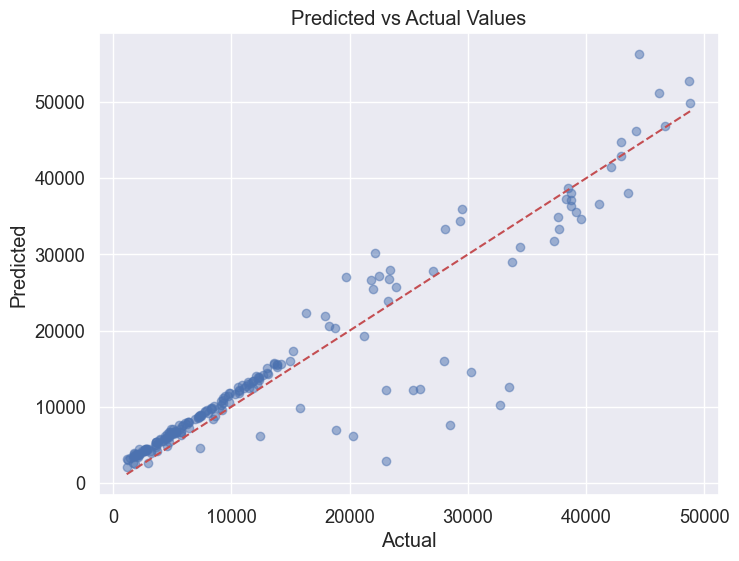

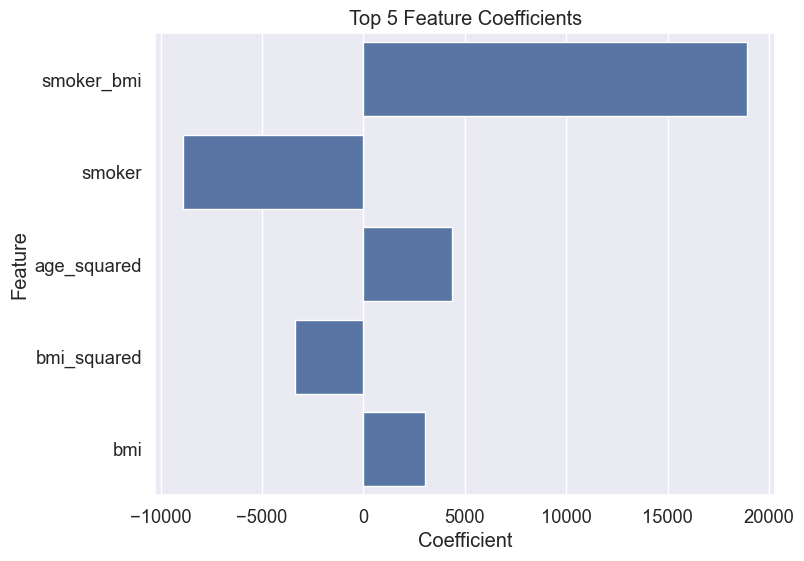

In [6]:
# simple evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Simple function to evaluate model performance"""
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Train RMSE: ${train_rmse:.2f}")
    print(f"Test RMSE: ${test_rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')
    plt.show()
    
    return model

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
lr = evaluate_model(lr, X_train, X_test, y_train, y_test)

# Show feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(5))
plt.title('Top 5 Feature Coefficients')
plt.show()

Polynomial Regression (degree=2):
Train RMSE: $4572.14
Test RMSE: $5101.33
R² Score: 0.8291


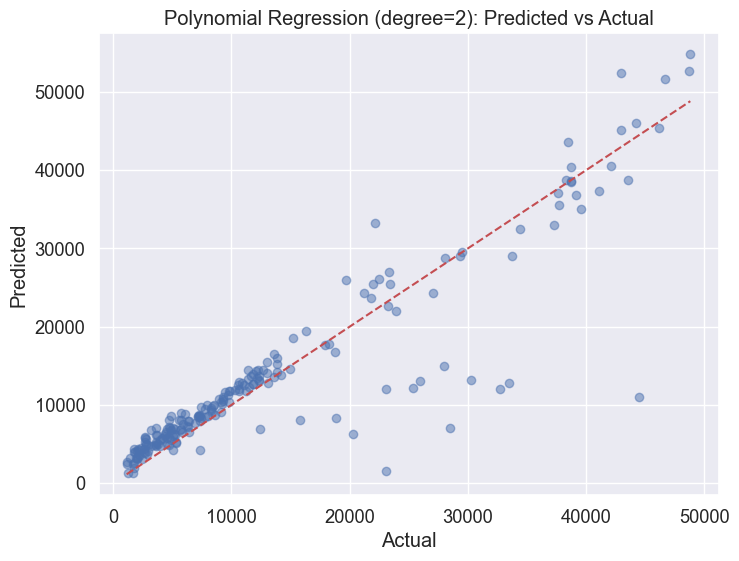

Polynomial Regression (degree=3):
Train RMSE: $4088.70
Test RMSE: $12161.97
R² Score: 0.0286


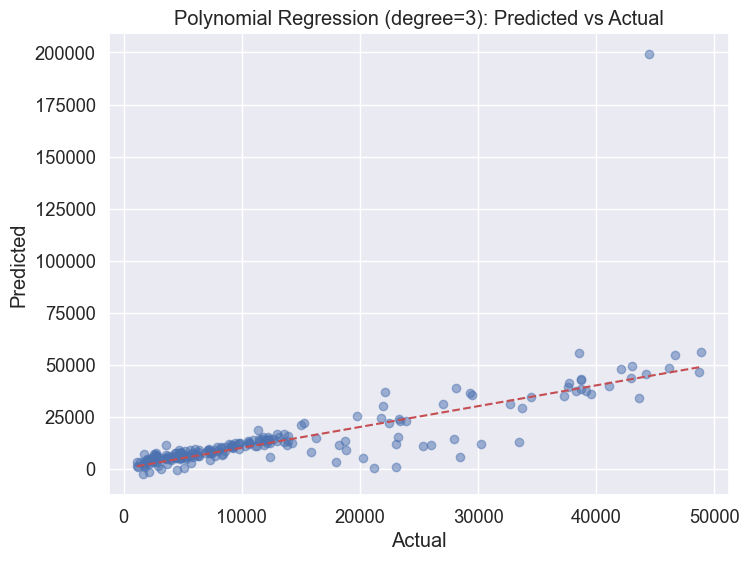

In [7]:
# Function to create and evaluate polynomial regression model
def polynomial_regression(X_train, X_test, y_train, y_test, degree=2):
    """Train and evaluate a polynomial regression model"""
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train linear regression on polynomial features
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    # Make predictions
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Polynomial Regression (degree={degree}):")
    print(f"Train RMSE: ${train_rmse:.2f}")
    print(f"Test RMSE: ${test_rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Polynomial Regression (degree={degree}): Predicted vs Actual')
    plt.show()
    
    return poly_reg, poly

# Try different polynomial degrees
for degree in [2, 3]:
    model, poly_transformer = polynomial_regression(X_train, X_test, y_train, y_test, degree)

Model Comparison:
                   Model  Training RMSE    Test RMSE   Test R²
0      Linear Regression    4807.361191  4556.203962  0.863668
1  Polynomial Regression    4572.138085  5101.334306  0.829093


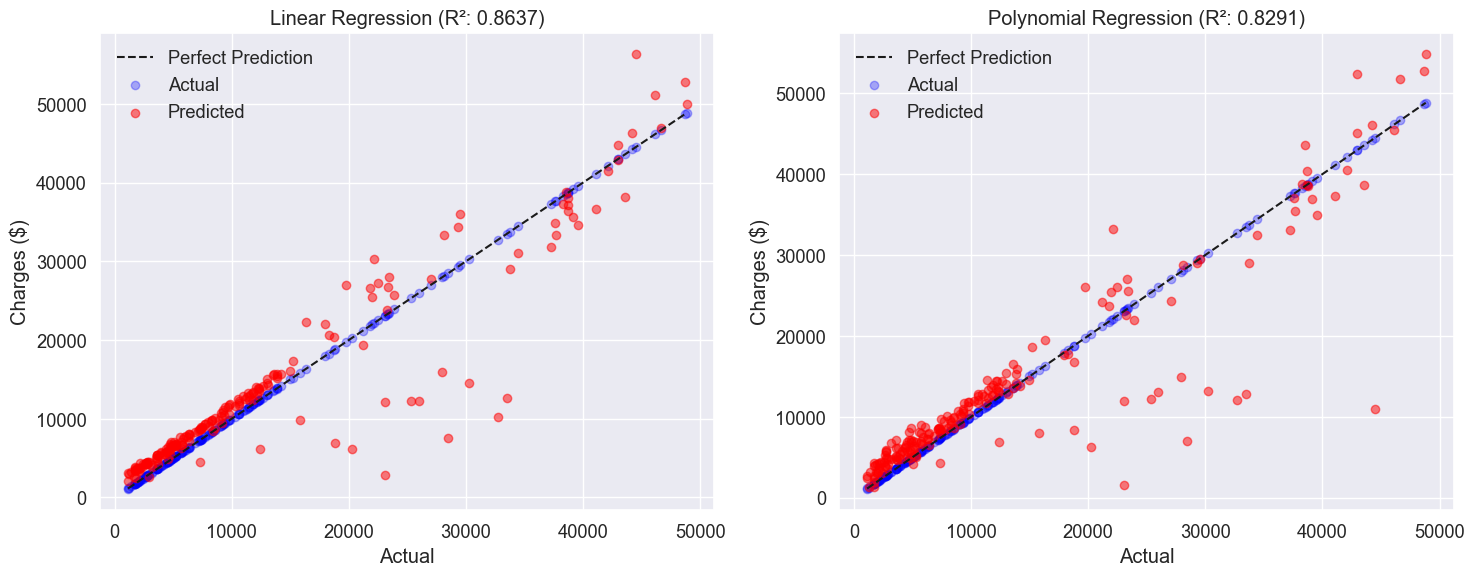

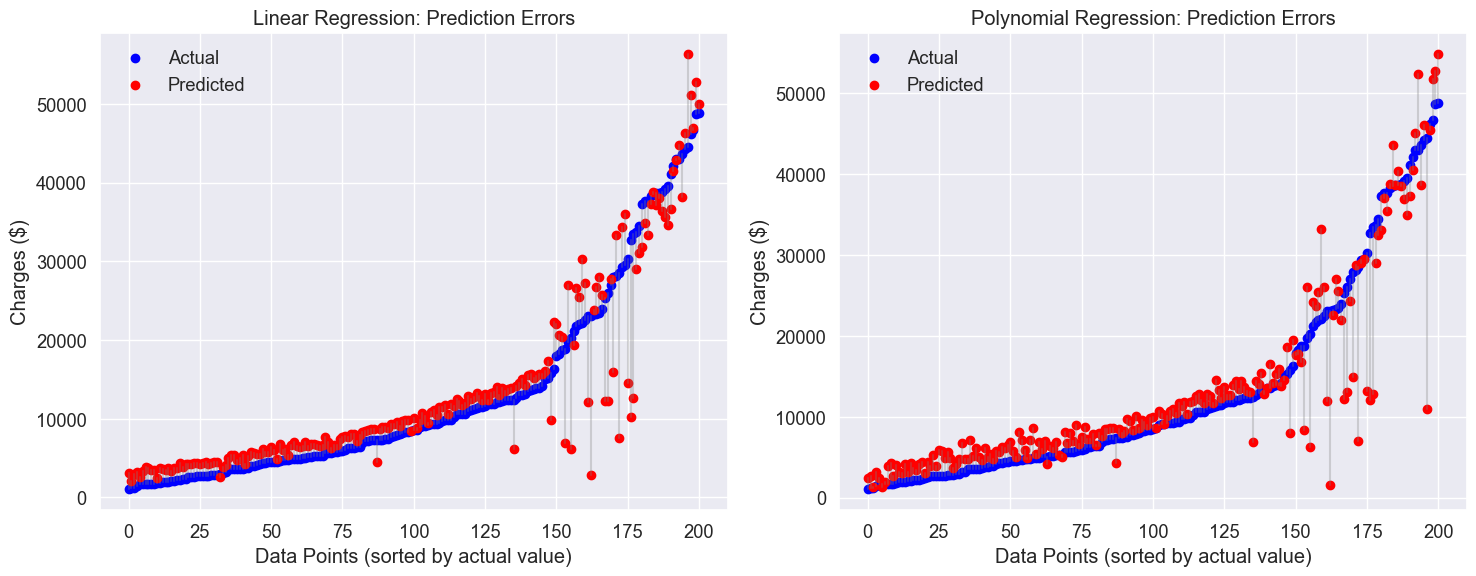

The better model is: Linear Regression
Performance improvement: 4.17%


In [8]:
# Compare Linear Regression vs Polynomial Regression

# 1. Train both models
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# Polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_train_pred = poly_reg.predict(X_train_poly)
poly_test_pred = poly_reg.predict(X_test_poly)

# 2. Calculate metrics for both models
# Linear regression metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_r2 = r2_score(y_test, lr_test_pred)

# Polynomial regression metrics
poly_train_rmse = np.sqrt(mean_squared_error(y_train, poly_train_pred))
poly_test_rmse = np.sqrt(mean_squared_error(y_test, poly_test_pred))
poly_r2 = r2_score(y_test, poly_test_pred)

# 3. Create comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Training RMSE': [lr_train_rmse, poly_train_rmse],
    'Test RMSE': [lr_test_rmse, poly_test_rmse],
    'Test R²': [lr_r2, poly_r2]
})

print("Model Comparison:")
print(comparison)

# 4. Visualize predictions with color differentiation
plt.figure(figsize=(15, 6))

# Linear Regression with color differentiation
plt.subplot(1, 2, 1)
# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
# Plot actual points
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Actual')
# Plot predicted points
plt.scatter(y_test, lr_test_pred, color='red', alpha=0.5, label='Predicted')
plt.title(f'Linear Regression (R²: {lr_r2:.4f})')
plt.xlabel('Actual')
plt.ylabel('Charges ($)')
plt.legend()

# Polynomial Regression with color differentiation
plt.subplot(1, 2, 2)
# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
# Plot actual points
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Actual')
# Plot predicted points
plt.scatter(y_test, poly_test_pred, color='red', alpha=0.5, label='Predicted')
plt.title(f'Polynomial Regression (R²: {poly_r2:.4f})')
plt.xlabel('Actual')
plt.ylabel('Charges ($)')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Alternative visualization: Show prediction errors with lines
plt.figure(figsize=(15, 6))

# Linear Regression with error lines
plt.subplot(1, 2, 1)
# Sort data for clearer visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices].reset_index(drop=True)
lr_pred_sorted = lr_test_pred[sorted_indices]

# Plot actual and predicted
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual')
plt.scatter(range(len(y_test_sorted)), lr_pred_sorted, color='red', label='Predicted')

# Connect with lines to show errors
for i in range(len(y_test_sorted)):
    plt.plot([i, i], [y_test_sorted[i], lr_pred_sorted[i]], 'gray', alpha=0.3)

plt.title('Linear Regression: Prediction Errors')
plt.xlabel('Data Points (sorted by actual value)')
plt.ylabel('Charges ($)')
plt.legend()

# Polynomial Regression with error lines
plt.subplot(1, 2, 2)
poly_pred_sorted = poly_test_pred[sorted_indices]

# Plot actual and predicted
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual')
plt.scatter(range(len(y_test_sorted)), poly_pred_sorted, color='red', label='Predicted')

# Connect with lines to show errors
for i in range(len(y_test_sorted)):
    plt.plot([i, i], [y_test_sorted[i], poly_pred_sorted[i]], 'gray', alpha=0.3)

plt.title('Polynomial Regression: Prediction Errors')
plt.xlabel('Data Points (sorted by actual value)')
plt.ylabel('Charges ($)')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Identify which model is better
better_model = "Polynomial Regression" if poly_r2 > lr_r2 else "Linear Regression"
improvement = ((poly_r2 - lr_r2) / lr_r2 * 100) if poly_r2 > lr_r2 else ((lr_r2 - poly_r2) / poly_r2 * 100)

print(f"The better model is: {better_model}")
print(f"Performance improvement: {improvement:.2f}%")

Our model have a pretty good fitting !  
Function follow the logic of datas with a little underestimating tendancy but it's totally ok.   

Also we can see linear regression model is better because :  
$R^2 : 0 < 0.8291 < 0.8637 < 1$


We can now verify the heights of features in prediction :

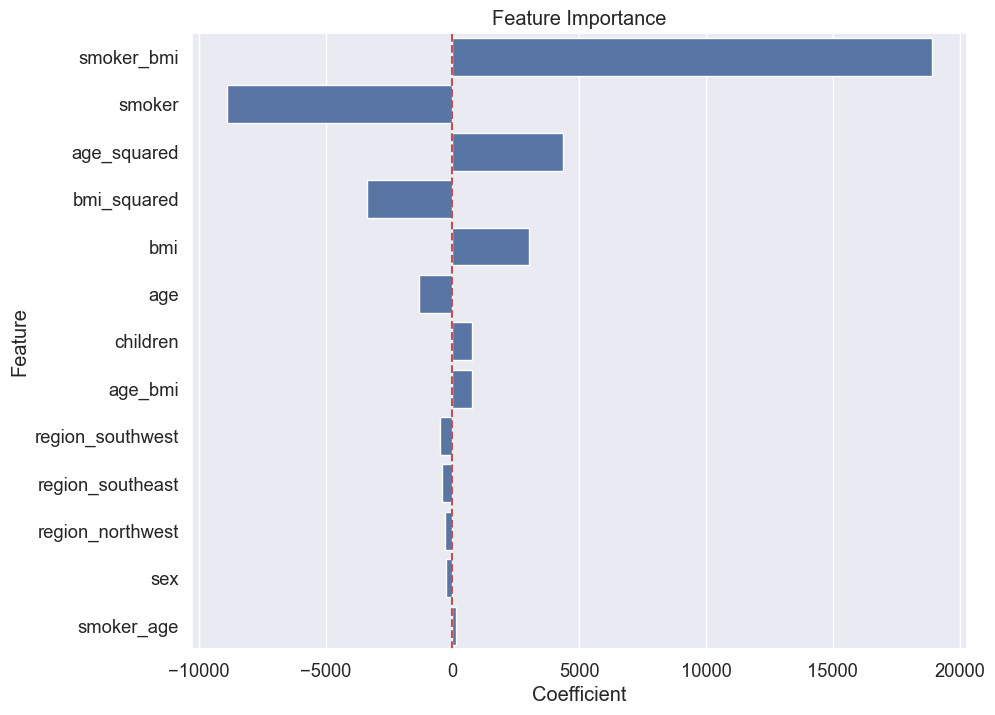

In [9]:
   # display coefficient values to understand feature importance
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
   
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

**smoker_bmi** seems to be the most important feature in prediction. (non-linear)  
Smoking alone (with a good bmi) doesn't necessarly increase costs 

age & bmi seems to be acceleratif effects on charges  
(cost increase as you get older)

###Saving model

Now that our model is good, we can save it to *models/* with ***.pkl*** extension.

In [11]:
# saving linear regression model
os.makedirs('../models', exist_ok=True)

with open('../models/insurance_model.pkl', 'wb') as f:
    pickle.dump({
        'model': lr,
        'features': X_train.columns.tolist()
    }, f)

print("Model saved successfully!")

Model saved successfully!


In [12]:
def predict_insurance_charge(age, sex, bmi, children, smoker, region):
    """Function to predict insurance charges for new individuals"""
    # create a DataFrame with input data
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [1 if sex == 'male' else 0],
        'bmi': [bmi],
        'children': [children],
        'smoker': [1 if smoker == 'yes' else 0],
        'region_northwest': [1 if region == 'northwest' else 0],
        'region_southeast': [1 if region == 'southeast' else 0],
        'region_southwest': [1 if region == 'southwest' else 0]
    })
    
    # DataFrame with our engineered features
    input_data['age_bmi'] = input_data['age'] * input_data['bmi']
    input_data['smoker_age'] = input_data['smoker'] * input_data['age']
    input_data['smoker_bmi'] = input_data['smoker'] * input_data['bmi']
    input_data['bmi_squared'] = input_data['bmi'] ** 2
    input_data['age_squared'] = input_data['age'] ** 2
    
    # make prediction
    prediction = lr.predict(input_data)[0]
    
    return prediction

# tests with examples
test_cases = [
    {"age": 30, "sex": "male", "bmi": 22, "children": 0, "smoker": "no", "region": "southeast"},
    {"age": 45, "sex": "female", "bmi": 28, "children": 2, "smoker": "yes", "region": "northwest"}
]

for case in test_cases:
    predicted_charge = predict_insurance_charge(**case)
    print(f"Person: {case}")
    print(f"Predicted charge: ${predicted_charge:.2f}\n")

Person: {'age': 30, 'sex': 'male', 'bmi': 22, 'children': 0, 'smoker': 'no', 'region': 'southeast'}
Predicted charge: $2843475.59

Person: {'age': 45, 'sex': 'female', 'bmi': 28, 'children': 2, 'smoker': 'yes', 'region': 'northwest'}
Predicted charge: $7728340.34

